In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
import matplotlib

%matplotlib inline

In [2]:
print('Python version {}'.format(sys.version))
print('Pandas version {}'.format(pd.__version__))
print('Matplotlib version {}'.format(matplotlib.__version__))

Python version 3.6.6 |Anaconda, Inc.| (default, Jun 28 2018, 11:07:29) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
Pandas version 0.23.3
Matplotlib version 2.2.2


# Create Data and Save to Excel

In [3]:
np.random.seed(111)

def CreateDataSet(Number=1):
    output = []
    for i in range(Number):
        # Create a weekly-Monday date range
        rng = pd.date_range(start='1/1/2009', end='12/31/2012', freq='W-MON')
        
        # Make a random list of statuses and a random list of states
        data = np.random.randint(low=25, high=1000, size=len(rng))
        status = [1, 2, 3]
        states = ['GA', 'FL', 'fl', 'NY', 'NJ', 'TX']
        random_status = [status[np.random.randint(len(status))] for i in range(len(rng))]
        random_states = [states[np.random.randint(len(states))] for i in range(len(rng))]
        
        output.extend(zip(random_states, random_status, data, rng))
    return output

In [4]:
dataset = CreateDataSet(4)
df = pd.DataFrame(data=dataset, columns=['State', 'Status', 'CustomerCount', 'StatusDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 4 columns):
State            836 non-null object
Status           836 non-null int64
CustomerCount    836 non-null int64
StatusDate       836 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 26.2+ KB


In [5]:
df.head()

,State,Status,CustomerCount,StatusDate
0,GA,1,877,2009-01-05
1,FL,1,901,2009-01-12
2,fl,3,749,2009-01-19
3,FL,3,111,2009-01-26
4,GA,1,300,2009-02-02


In [6]:
df.to_excel('lesson3.xls', index=False)
print('Done')

Done


# Grab Data from Excel

In [7]:
Location = 'lesson3.xls'

# 指定索引列为StatusDate
df = pd.read_excel(Location, sheet_name=0, index_col='StatusDate')
df.dtypes

State            object
Status            int64
CustomerCount     int64
dtype: object

In [8]:
df.index

DatetimeIndex(['2009-01-05', '2009-01-12', '2009-01-19', '2009-01-26',
               '2009-02-02', '2009-02-09', '2009-02-16', '2009-02-23',
               '2009-03-02', '2009-03-09',
               ...
               '2012-10-29', '2012-11-05', '2012-11-12', '2012-11-19',
               '2012-11-26', '2012-12-03', '2012-12-10', '2012-12-17',
               '2012-12-24', '2012-12-31'],
              dtype='datetime64[ns]', name='StatusDate', length=836, freq=None)

In [9]:
df.head()

,State,Status,CustomerCount
StatusDate,,,
2009-01-05,GA,1,877
2009-01-12,FL,1,901
2009-01-19,fl,3,749
2009-01-26,FL,3,111
2009-02-02,GA,1,300


# Prepare Data
- **There are 4 purposes:**
    - Make sure the **state** column is all in **upper case**
    - Only **select** records where the account **status** is equal to **"1"**
    - **Merge** NJ and NY to NY in the status column
    - **Remove** any **outliers**(any **odd results** in the data set)

## Convert state column to upper case

In [10]:
df.State.unique()

array(['GA', 'FL', 'fl', 'TX', 'NY', 'NJ'], dtype=object)

In [11]:
df.State = df.State.apply(lambda x: x.upper())
df.State.unique()

array(['GA', 'FL', 'TX', 'NY', 'NJ'], dtype=object)

## Select records where status == "1"

In [12]:
mask = (df.Status == 1)
df = df[mask]
df.Status.unique()

array([1])

## Merge "NJ" to "NY"

In [13]:
mask = (df.State == 'NJ')
df.State[mask] = 'NY'
df.State.unique()

array(['GA', 'FL', 'NY', 'TX'], dtype=object)

## Remove outliers

In [14]:
df.head(10)

,State,Status,CustomerCount
StatusDate,,,
2009-01-05,GA,1,877
2009-01-12,FL,1,901
2009-02-02,GA,1,300
2009-03-09,NY,1,992
2009-04-06,FL,1,291
2009-04-27,NY,1,753
2009-05-25,TX,1,46
2009-07-06,FL,1,723
2009-07-20,FL,1,710


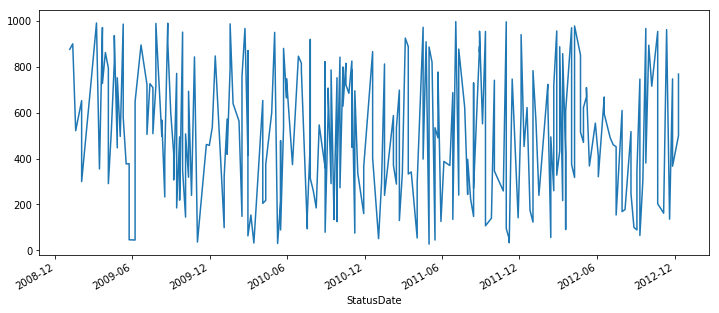

In [15]:
df.CustomerCount.plot(figsize=(12, 5))

In [16]:
# 仅过滤[df.State == 'FL']的数据，发现2009-04-06有重复数据
sortdf = df[df.State == 'FL'].sort_index(axis=0)
sortdf.head(10)

,State,Status,CustomerCount
StatusDate,,,
2009-01-12,FL,1,901
2009-02-02,FL,1,653
2009-03-23,FL,1,752
2009-04-06,FL,1,291
2009-04-06,FL,1,795
2009-06-08,FL,1,649
2009-07-06,FL,1,723
2009-07-13,FL,1,727
2009-07-20,FL,1,710


### MultiIndex

In [17]:
# The reset_index function will bring the index StatusDate back to a column in the dataframe.
# 一级索引 = State，二级索引 = StatusDate
# 对重复数据进行按行求和
Daily = df.reset_index().groupby(['State', 'StatusDate']).sum()
Daily.head()

Status  CustomerCount
State StatusDate                       
FL    2009-01-12       1            901
      2009-02-02       1            653
      2009-03-23       1            752
      2009-04-06       2           1086
      2009-06-08       1            649

In [18]:
del Daily['Status']
Daily.head()

CustomerCount
State StatusDate               
FL    2009-01-12            901
      2009-02-02            653
      2009-03-23            752
      2009-04-06           1086
      2009-06-08            649

In [19]:
Daily.index.levels[0]

Index(['FL', 'GA', 'NY', 'TX'], dtype='object', name='State')

In [20]:
Daily.index.levels[1]

DatetimeIndex(['2009-01-05', '2009-01-12', '2009-01-19', '2009-02-02',
               '2009-02-23', '2009-03-09', '2009-03-16', '2009-03-23',
               '2009-03-30', '2009-04-06',
               ...
               '2012-09-24', '2012-10-01', '2012-10-08', '2012-10-22',
               '2012-10-29', '2012-11-05', '2012-11-12', '2012-11-19',
               '2012-11-26', '2012-12-10'],
              dtype='datetime64[ns]', name='StatusDate', length=161, freq=None)

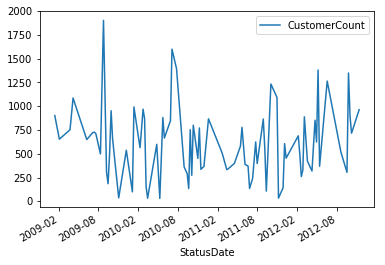

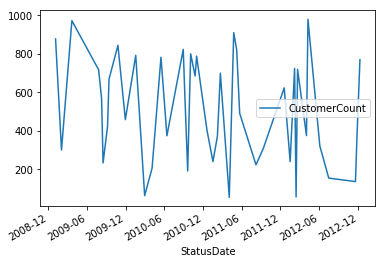

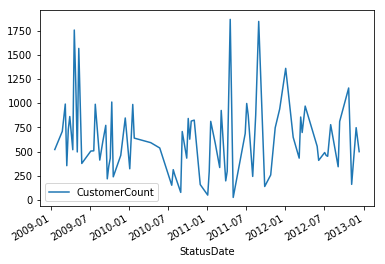

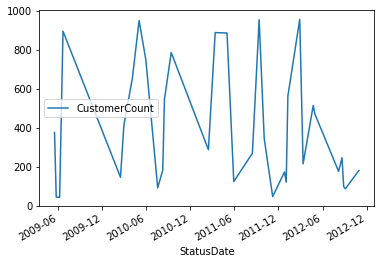

In [21]:
for state in Daily.index.levels[0]:
    Daily.loc[state].plot()

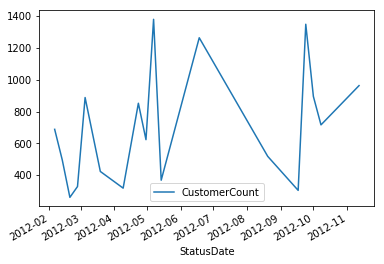

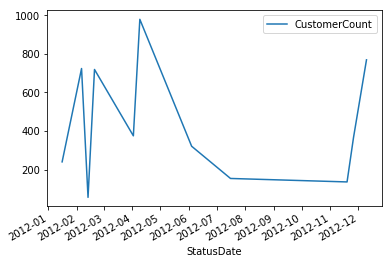

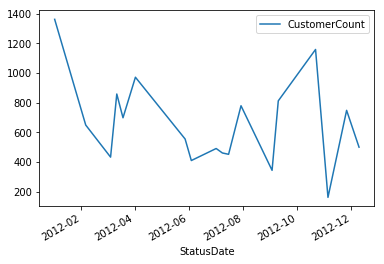

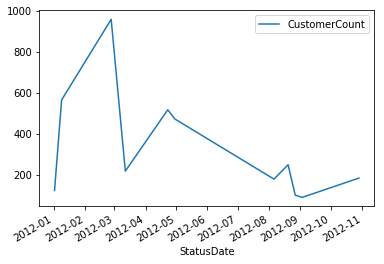

In [22]:
for state in Daily.index.levels[0]:
    Daily.loc[state]['2012'].plot()

### Calculate and Remove Outliers
We will assume that per month the customer count should remain **relatively steady**. Any data outside a specific range in that month will **be removed** from the data set. The final result should have smooth graphs with **no spikes**.

- **StateYearMonth** - Here we group by State, Year of StatusDate, and Month of StatusDate.
- **Daily['Outlier']** - A boolean (True or False) value letting us know if the value in the CustomerCount column is ouside the acceptable range.

We will be using the attribute **transform** instead of **apply**. The reason is that transform will **keep the shape** of the dataframe the same and apply will not. By looking at the previous graphs, we can realize they are not resembling a gaussian distribution, this means **we cannot use summary statistics like the mean and stDev**. We **use percentiles instead**. Note that we run the risk of eliminating good data.

In [23]:
StateYearMonth = Daily.groupby([Daily.index.get_level_values(0), 
                                Daily.index.get_level_values(1).year,
                                Daily.index.get_level_values(1).month])
StateYearMonth

In [24]:
# Calculate Outliers
Daily['Lower'] = StateYearMonth['CustomerCount'].transform(
    lambda x: x.quantile(q=.25) - (1.5*x.quantile(q=.75) - x.quantile(q=.25)))
Daily['Upper'] = StateYearMonth['CustomerCount'].transform(
    lambda x: x.quantile(q=.75) + (1.5*x.quantile(q=.75) - x.quantile(q=.25)))
Daily['Outlier'] = (Daily['CustomerCount'] < Daily.Lower) | (Daily['CustomerCount'] > Daily.Upper)
    
#Remove Outliers
Daily = Daily[Daily.Outlier == False]

Daily.head()

CustomerCount  Lower   Upper  Outlier
State StatusDate                                       
FL    2009-01-12            901  450.5  1351.5    False
      2009-02-02            653  326.5   979.5    False
      2009-03-23            752  376.0  1128.0    False
      2009-04-06           1086  543.0  1629.0    False
      2009-06-08            649  324.5   973.5    False

- We create a separate dataframe named `ALL` which groups the Daily dataframe by StatusDate. We are essentially getting rid of the State column. The Max column represents the maximum customer count per month. The Max column is used to smooth out the graph.

In [25]:
# Combine all States' market
ALL = pd.DataFrame(Daily.CustomerCount.groupby(Daily.index.get_level_values(1)).sum())
ALL.columns = ['CustomerCount']

YearMonth = ALL.groupby([lambda x: x.year, lambda x: x.month])

ALL['Max'] = YearMonth.CustomerCount.transform(lambda x: x.max())
ALL.head()

,CustomerCount,Max
StatusDate,,
2009-01-05,877,901
2009-01-12,901,901
2009-01-19,522,901
2009-02-02,953,953
2009-02-23,710,953


### Goals and Forecast

There is also an interest to gauge if the current customer counts were reaching certain goals the company had established. The task here is to visually show if the current customer counts are meeting the goals listed below. We will call the goals `BHAG` (Big Hairy Annual Goal).

- 12/31/2011 - 1,000 customers
- 12/31/2012 - 2,000 customers
- 12/31/2013 - 3,000 customers

We will be using the `date_range` function to create our dates.

- **Definition:** date_range(start=None, end=None, periods=None, freq='D', tz=None, normalize=False, name=None, closed=None)
- **Docstring:** Return a fixed frequency datetime index, with day (calendar) as the default frequency

By choosing the frequency to be `A` or `annual` we will be able to get the three target dates from above.

In [26]:
data = [1000, 2000, 3000]
idx = pd.date_range(start='12/31/2011', end='12/31/2013', freq='A')
BHAG = pd.DataFrame(data, index=idx, columns=['BHAG'])
BHAG

,BHAG
2011-12-31,1000
2012-12-31,2000
2013-12-31,3000


In [27]:
combined = pd.concat([ALL, BHAG], axis=0)
combined = combined.sort_index(axis=0)
combined.tail()

/Users/zhoujl/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,BHAG,CustomerCount,Max
2012-11-19,NaN,136.0,1115.0
2012-11-26,NaN,1115.0,1115.0
2012-12-10,NaN,1269.0,1269.0
2012-12-31,2000.0,NaN,NaN
2013-12-31,3000.0,NaN,NaN


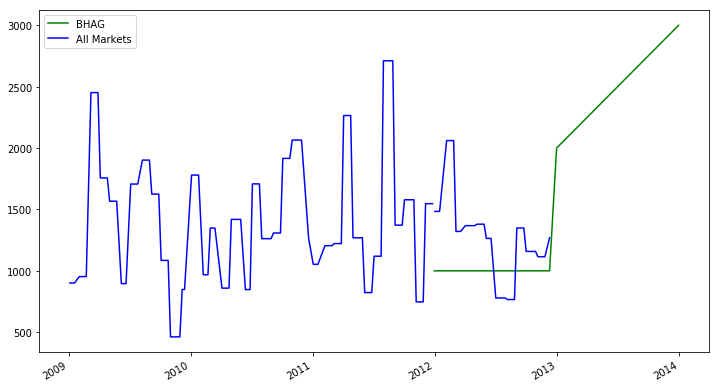

In [28]:
fig, axes = plt.subplots(figsize=(12, 7))

combined.BHAG.fillna(method='pad').plot(color='green', label='BHAG')
combined.Max.plot(color='blue', label='All Markets')
plt.legend(loc='best')

There was also a need to forecast next year's customer count and we can do this in a couple of simple steps. We will first group the **combined** dataframe by **Year** and place the maximum customer count for that year. This will give us one row per Year.

In [29]:
# Group by Year and then get the max value per year
Year = combined.groupby(lambda x: x.year).max()
Year

,BHAG,CustomerCount,Max
2009,NaN,2452.0,2452.0
2010,NaN,2065.0,2065.0
2011,1000.0,2711.0,2711.0
2012,2000.0,2061.0,2061.0
2013,3000.0,NaN,NaN


In [30]:
Year['YR_PCT_Change'] = Year.Max.pct_change(periods=1)
Year

,BHAG,CustomerCount,Max,YR_PCT_Change
2009,NaN,2452.0,2452.0,NaN
2010,NaN,2065.0,2065.0,-0.157830
2011,1000.0,2711.0,2711.0,0.312833
2012,2000.0,2061.0,2061.0,-0.239764
2013,3000.0,NaN,NaN,0.000000


In [31]:
(1 + Year.loc[2012, 'YR_PCT_Change']) * Year.loc[2012, 'Max']

1566.8465510881595

# Present Data

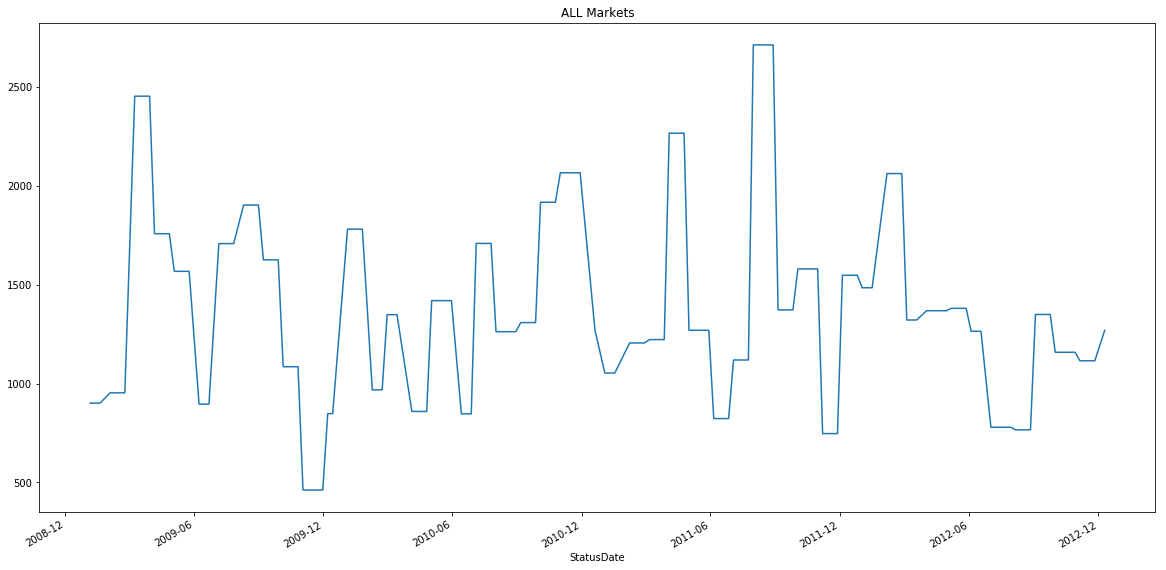

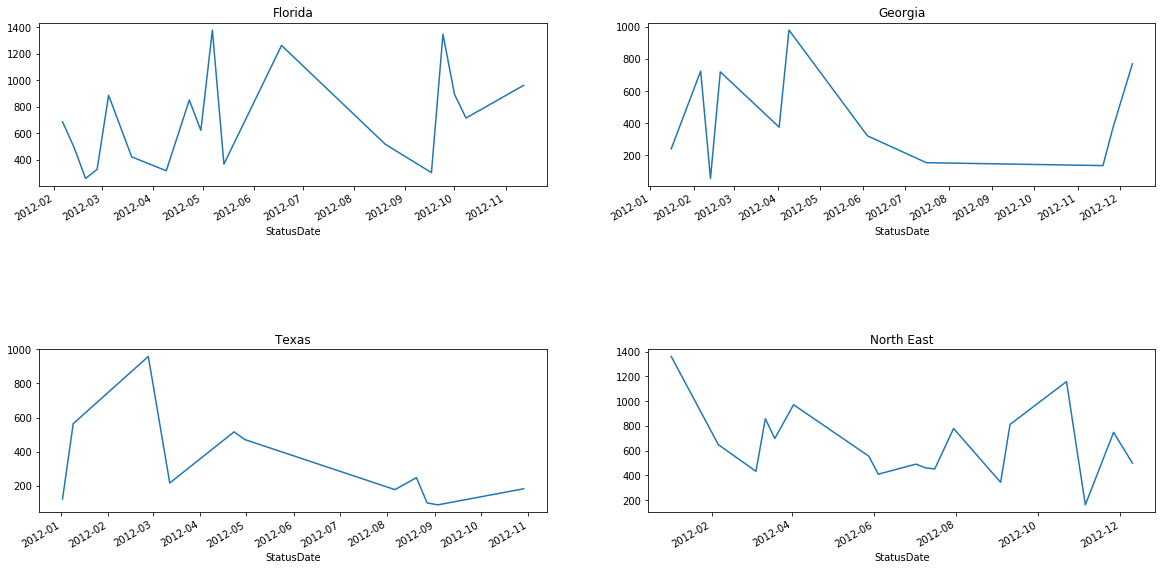

In [38]:
# First Graph
ALL['Max'].plot(figsize=(20, 10));plt.title('ALL Markets')

# Last four Graphs
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
fig.subplots_adjust(hspace=1.0) ## Create space between plots
axes_locations = [axes[0, 0], axes[0, 1], axes[1, 0], axes[1, 1]]
states_info = [['FL', 'Florida'], ['GA', 'Georgia'], ['TX', 'Texas'], ['NY', 'North East']]
for state_info, axes_location in zip(states_info, axes_locations):
    Daily.loc[state_info[0]]['CustomerCount']['2012':].fillna(method='pad') \
                                                      .plot(ax=axes_location)
    axes_location.set_title(state_info[1])